# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan pada quiz membangun machine learning untuk pemula kali ini saya ambil dari kaggle dengan nama **cleaned_dataset.csv**
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki sekitar 20 ribu baris
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Artist,Track,Album, Album_type, title, channel, licensed, official_video, dan most_playedon
     - *Numerikal*: Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream, dan EnergyLiveness

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pointbiserialr, f_oneway
from sklearn.cluster import AgglomerativeClustering

ModuleNotFoundError: No module named 'google.colab'

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [19]:
data = pd.read_csv('cleaned_dataset.csv')
data

# Menampilkan ringkasan informasi dari dataset
data.info()

# Menampilkan statistik deskriptif dari dataset
data.describe(include="all")

# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


4.1 **Memahami Struktur Data**
   

In [3]:
# Memahami Struktur Data
print("\n--- Struktur Data ---")
print(f"Jumlah baris dan kolom: {data.shape}")
print(f"Tipe data setiap kolom:\n{data.dtypes}")
print("\n--- Lima Baris Pertama ---")
print(data.head())


--- Struktur Data ---
Jumlah baris dan kolom: (20594, 24)
Tipe data setiap kolom:
Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_min        float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
official_video       object
Stream              float64
EnergyLiveness      float64
most_playedon        object
dtype: object

--- Lima Baris Pertama ---
     Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New 

4.2 **Menangani Data yang Hilang**  

In [4]:
# Menangani Data yang Hilang
print("\n--- Data yang Hilang ---")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(pd.DataFrame({'Jumlah Data Hilang': missing_values, 'Persentase': missing_percentage}))

# Opsional: Mengisi data hilang dengan nilai tertentu atau menghapus baris yang hilang
data = data.fillna(method='ffill')  # Contoh: Mengisi dengan nilai sebelumnya



--- Data yang Hilang ---
                  Jumlah Data Hilang  Persentase
Artist                             0    0.000000
Track                              0    0.000000
Album                              0    0.000000
Album_type                         0    0.000000
Danceability                       0    0.000000
Energy                             0    0.000000
Loudness                           0    0.000000
Speechiness                        0    0.000000
Acousticness                       0    0.000000
Instrumentalness                   0    0.000000
Liveness                           0    0.000000
Valence                            0    0.000000
Tempo                              0    0.000000
Duration_min                       0    0.000000
Title                              0    0.000000
Channel                            0    0.000000
Views                              0    0.000000
Likes                              0    0.000000
Comments                           0    0.0

<ipython-input-4-a361c5bb4871>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Contoh: Mengisi dengan nilai sebelumnya



4.3 **Analisis Distribusi dan Korelasi**  

In [5]:
# 3. Analisis Distribusi dan Korelasi
print("\n--- Statistik Deskriptif ---")
print(data.describe())



--- Statistik Deskriptif ---
       Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  20594.000000  20594.000000  20594.000000  20594.000000  20594.000000   
mean       0.620102      0.635176     -7.678254      0.096733      0.291391   
std        0.165504      0.214274      4.639481      0.112182      0.286117   
min        0.000000      0.000000    -46.251000      0.000000      0.000000   
25%        0.519000      0.507000     -8.868000      0.035700      0.045200   
50%        0.638000      0.666000     -6.540500      0.050650      0.193000   
75%        0.741000      0.798000     -4.935000      0.104000      0.476750   
max        0.975000      1.000000      0.920000      0.964000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  \
count      20594.000000  20594.000000  20594.000000  20594.000000   
mean           0.056162      0.193653      0.530077    120.562616   
std            0.193622      0.168832      0.245542

4.3.1 **Pisahkan kolom numerik dan kategorikal**  

In [6]:
# Tentukan kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns


4.4 **Visualisasi Data**  

4.4.1 **Visualisasi Distribusi Variabel Numerik**  

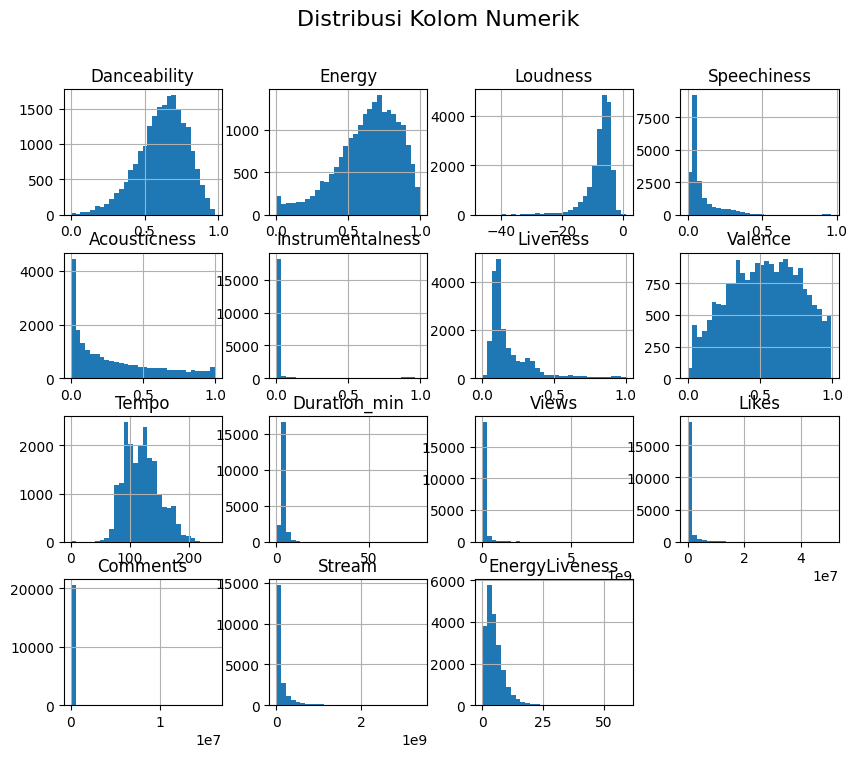

In [7]:
# Visualisasi Kolom Numerik
data[numerical_cols].hist(bins=30, figsize=(10, 8))
plt.suptitle("Distribusi Kolom Numerik", fontsize=16)
plt.show()


4.4.2 **Visualisasi Korelasi**

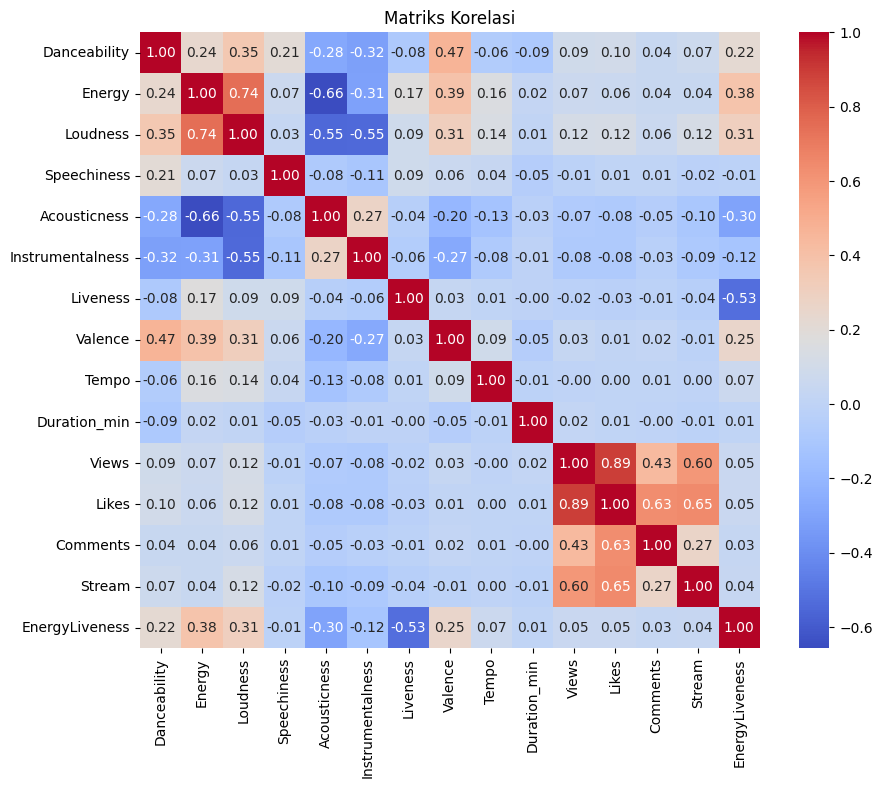

In [8]:
# Visualisasi korelasi
if len(numerical_cols) > 1:
    correlation_matrix = data[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriks Korelasi')
    plt.show()

4.4.3 **Visualisasi Kolom Kategorikal**

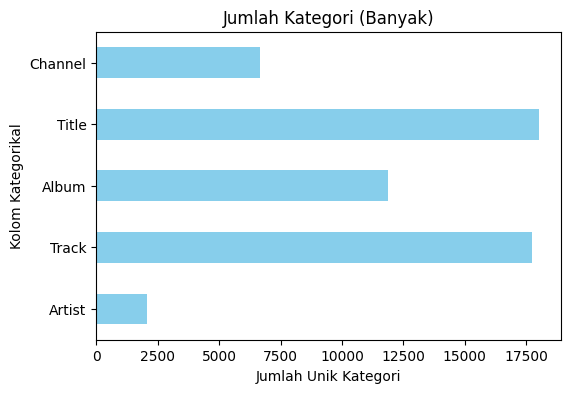

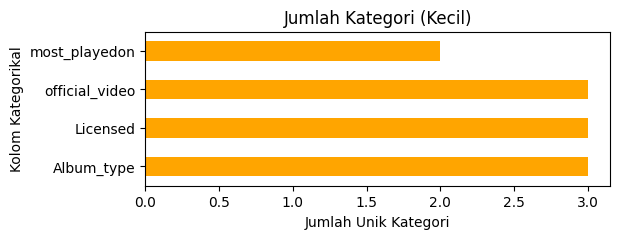

In [9]:
# Hitung jumlah kategori
category_counts = data[categorical_cols].nunique()

# Pisahkan fitur berdasarkan jumlah kategori
small_categories = ["Album_type", "Licensed", "official_video", "most_playedon"]
large_categories = [col for col in categorical_cols if col not in small_categories]

# Visualisasi untuk kategori besar
plt.figure(figsize=(6, 4))
category_counts[large_categories].plot(kind='barh', color='skyblue')
plt.xlabel("Jumlah Unik Kategori")
plt.ylabel("Kolom Kategorikal")
plt.title("Jumlah Kategori (Banyak)")
plt.show()

# Visualisasi untuk kategori kecil
plt.figure(figsize=(6, 2))
category_counts[small_categories].plot(kind='barh', color='orange')
plt.xlabel("Jumlah Unik Kategori")
plt.ylabel("Kolom Kategorikal")
plt.title("Jumlah Kategori (Kecil)")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

5.1 **Normalisasi atau Standarisasi Fitur**

In [10]:
# Normalisasi Data Numerik
scaler = StandardScaler()
data_numerical_scaled = scaler.fit_transform(data[numerical_cols])

5.2 **Deteksi dan Penanganan Outlier**

In [11]:
# 4. Deteksi dan Penanganan Outlier
# Menggunakan IQR untuk mendeteksi outlier
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
    print(f"\nOutlier pada {col}: {outliers.sum()} ditemukan.")
    # Opsional: Tangani outlier (drop atau impute)
    # data = data[~outliers]



Outlier pada Danceability: 271 ditemukan.

Outlier pada Energy: 366 ditemukan.

Outlier pada Loudness: 1284 ditemukan.

Outlier pada Speechiness: 2591 ditemukan.

Outlier pada Acousticness: 0 ditemukan.

Outlier pada Instrumentalness: 4413 ditemukan.

Outlier pada Liveness: 1500 ditemukan.

Outlier pada Valence: 0 ditemukan.

Outlier pada Tempo: 65 ditemukan.

Outlier pada Duration_min: 801 ditemukan.

Outlier pada Views: 2696 ditemukan.

Outlier pada Likes: 2625 ditemukan.

Outlier pada Comments: 2677 ditemukan.

Outlier pada Stream: 2278 ditemukan.

Outlier pada EnergyLiveness: 798 ditemukan.


5.3 **Encoding Data Categorical**

In [12]:
# Definisikan kategori kecil dan besar
small_categories = ['Album_type', 'Licensed', 'official_video', 'most_playedon']
large_categories = ['Artist', 'Track', 'Album', 'Channel']  # fitur "Title" tidak saya masukan karena memiliki terlalu banyak variasi tetapi tidak terlalu berpengaruh terhadap clustering

# Encoding Data Kategorikal
encoder = OneHotEncoder(drop='first', sparse_output=False)
small_cat_encoded = encoder.fit_transform(data[small_categories])

label_encoders = {}
large_cat_encoded = np.zeros((len(data), len(large_categories)))

for i, col in enumerate(large_categories):
    le = LabelEncoder()
    large_cat_encoded[:, i] = le.fit_transform(data[col])
    label_encoders[col] = le

5.4 **Binning (Pengelompokan Data)**

In [13]:
# Binning (Pengelompokan Data)
# Contoh: Binning untuk kolom numerik
if 'Age' in data.columns:
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Youth', 'Adult', 'Senior'])
    print("\n--- Distribusi Age_Group ---")
    print(data['Age_Group'].value_counts())

5.5 **Visualisai Binning (Pengelompokan Data)**

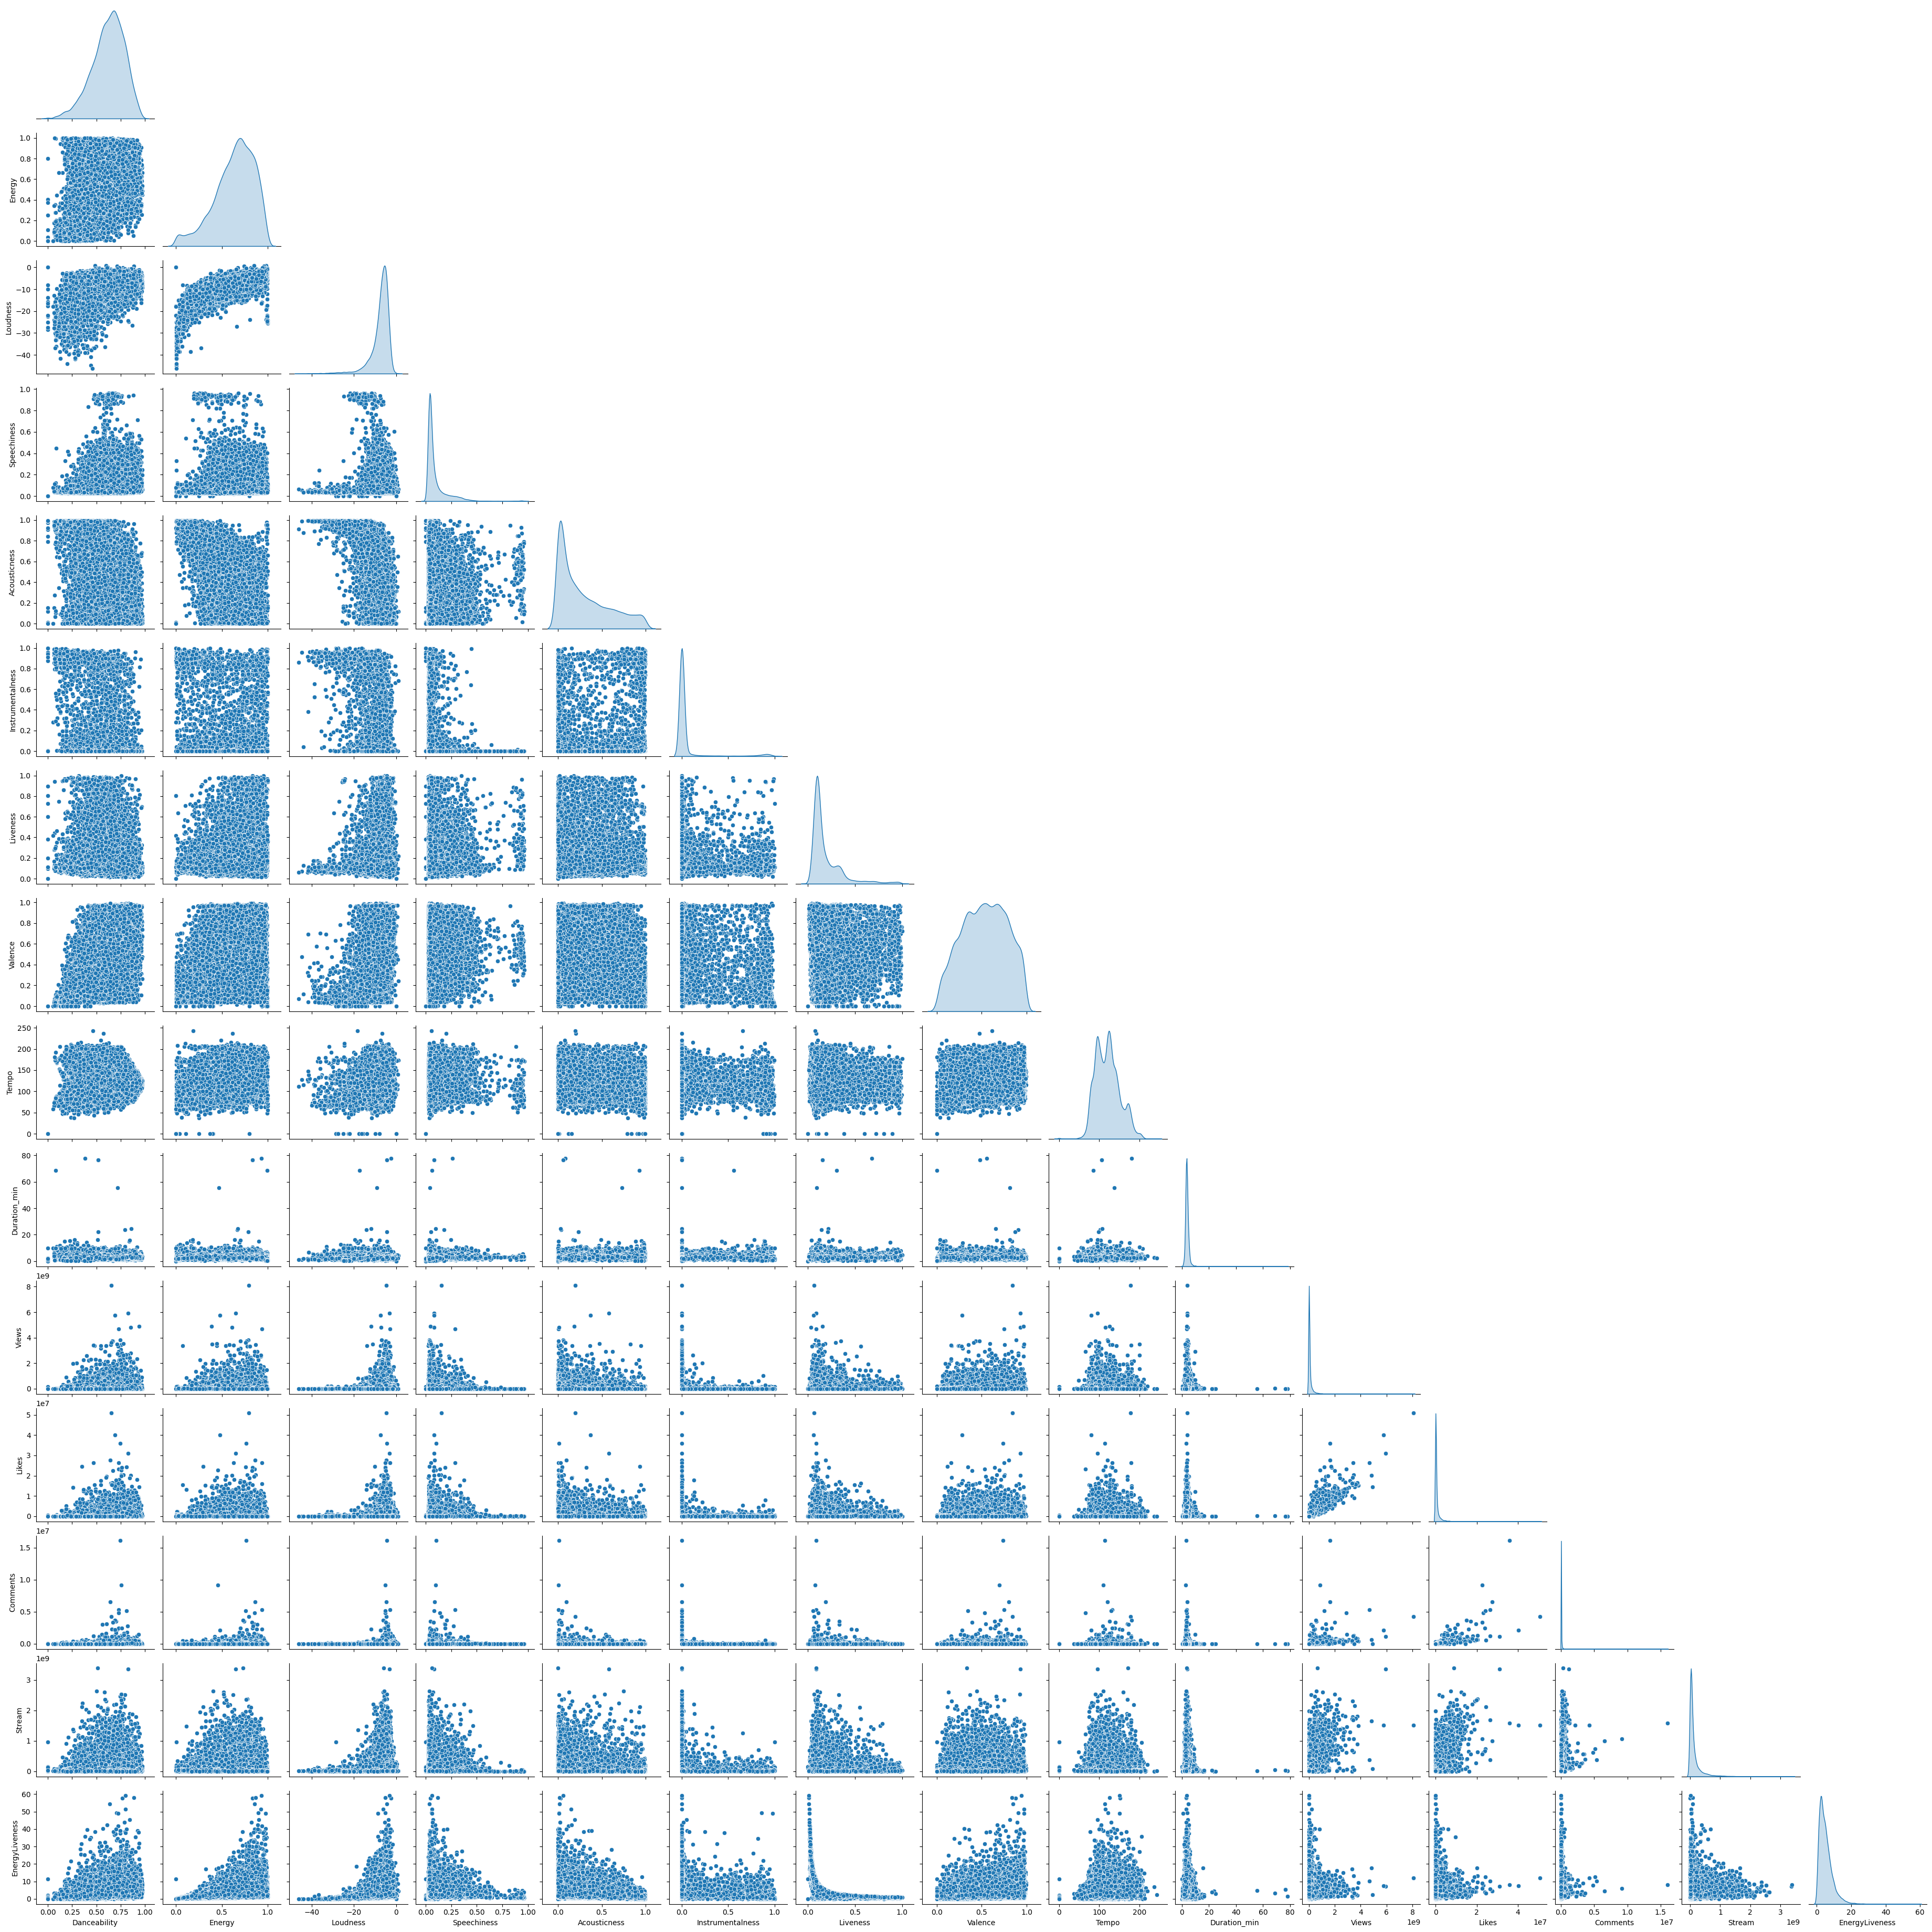

In [14]:
# Visualisasi Data Setelah Preprocessing
sns.pairplot(data[numerical_cols], diag_kind='kde', corner=True)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [20]:
# Gabungkan Semua Data yang Telah Diproses
data_combined = np.hstack((data_numerical_scaled, large_cat_encoded, small_cat_encoded))

# Reduksi Dimensi dengan PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_combined)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
agglo_labels = agglo.fit_predict(data_pca)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **b.1 Evaluasi Model Clustering Dengan silhoute Score**


In [21]:
# Evaluasi dengan Silhouette Score
silhouette = silhouette_score(data_pca, agglo_labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.5213


### **b.2 Analisis Cluster**

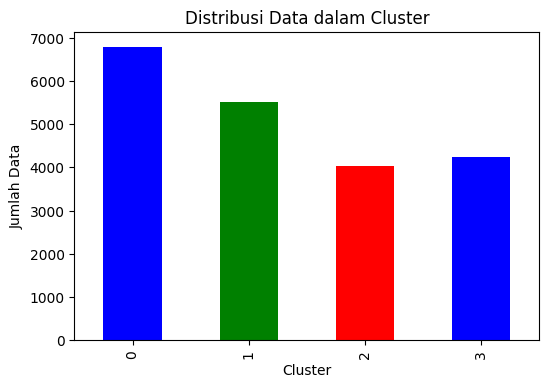

In [22]:
# Konversi label cluster menjadi DataFrame
cluster_counts = pd.Series(agglo_labels).value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(6, 4))
cluster_counts.plot(kind="bar", color=["blue", "green", "red"])
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data dalam Cluster")
plt.show()

## **c. Feature Selection (Opsional)**

---



Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **c.1 Feature Selection Menggunakan Varian Threshold**

In [23]:
# Menggunakan Variance Threshold untuk feature selection
selector = VarianceThreshold(threshold=1.0)
data_selected = selector.fit_transform(data_combined)

print(f"Sebelum Feature Selection: {data_combined.shape[1]} fitur")
print(f"Sesudah Feature Selection: {data_selected.shape[1]} fitur")

# Reduksi Dimensi dengan PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_selected)

Sebelum Feature Selection: 26 fitur
Sesudah Feature Selection: 15 fitur


### **c.2 Melatih model AGGLOMERATIVE dengan data yang sudah diseleksi**

In [24]:
# Agglomerative Clustering setelah feature selection dan PCA
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')

### **c.3 Menambahkan label cluster ke dataset yang telah diseleksi**

In [25]:
agglo_labels = agglo.fit_predict(data_pca)

### **c.4 Evaluasi clustering dengan Silhouette Score untuk data yang telah diseleksi**

In [26]:
# Evaluasi dengan Silhouette Score
silhouette_after = silhouette_score(data_pca, agglo_labels)
print(f"Silhouette Score Sesudah Feature Selection: {silhouette_after:.4f}")

Silhouette Score Sesudah Feature Selection: 0.5213


### **c.5 Bandingkan Hasil Sebelum dan Sesudah Feature Selection**

In [27]:
# Agglomerative Clustering sebelum feature selection (menggunakan data asli)
agglo_before = AgglomerativeClustering(n_clusters=4, linkage='average')

# Assuming 'data_combined' represents the original data before feature selection
# Apply PCA to the original data
pca_before = PCA(n_components=1)
data_pca_before = pca_before.fit_transform(data_combined)

agglo_labels_before = agglo_before.fit_predict(data_pca_before)  # Data tanpa feature selection

# Evaluasi Silhouette Score sebelum feature selection
silhouette_before = silhouette_score(data_pca_before, agglo_labels_before)
print(f"Silhouette Score Sebelum Feature Selection: {silhouette_before:.4f}")

# Bandingkan hasilnya
if silhouette_after > silhouette_before:
    print("Model setelah feature selection lebih baik")
else:
    print("Model sebelum feature selection lebih baik")

Silhouette Score Sebelum Feature Selection: 0.5213
Model sebelum feature selection lebih baik


## **e. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

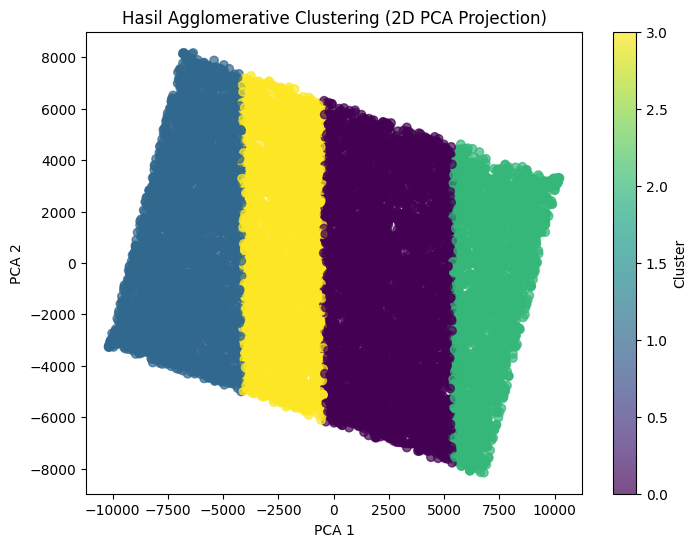

In [28]:
# Reduksi Dimensi dengan PCA untuk visualisasi 2D
pca = PCA(n_components=2)  # Mengurangi dimensi ke 2 untuk visualisasi
data_pca = pca.fit_transform(data_combined)  # Menggunakan data yang telah diproses

# Visualisasi clustering dalam 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglo_labels, cmap='viridis', alpha=0.7)
plt.title("Hasil Agglomerative Clustering (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

## **f. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### 1.Statistik Deskriptif per Cluster



In [34]:
# Statistik deskriptif untuk fitur numerik
numerical_stats = data.groupby('Cluster')[numerical_cols].describe()
print("Statistik Deskriptif untuk Fitur Numerik:")
print(numerical_stats)

# Statistik untuk kolom kategori (misalnya melihat distribusi kategori per cluster)
categorical_cols = data.select_dtypes(include=['object']).columns

print("\nDistribusi Kategori per Cluster:")
for col in categorical_cols:
    print(f"\nDistribusi {col} per Cluster:")
    print(data.groupby('Cluster')[col].value_counts())  # Melihat frekuensi tiap kategori dalam setiap cluster


Statistik Deskriptif untuk Fitur Numerik:
        Danceability                                                         \
               count      mean       std  min      25%    50%    75%    max   
Cluster                                                                       
0             6806.0  0.621573  0.164943  0.0  0.51925  0.640  0.743  0.973   
1             5511.0  0.627292  0.165853  0.0  0.53100  0.646  0.749  0.975   
2             4031.0  0.607135  0.170138  0.0  0.50000  0.626  0.732  0.970   
3             4246.0  0.620722  0.160782  0.0  0.52100  0.635  0.736  0.975   

         Energy            ... EnergyLiveness            Cluster            \
          count      mean  ...            75%        max   count mean  std   
Cluster                    ...                                               
0        6806.0  0.636007  ...       6.741858  59.113924  6806.0  0.0  0.0   
1        5511.0  0.643651  ...       7.000000  54.522293  5511.0  1.0  0.0   
2        4031.

### 2. Distribusi Nilai dalam Cluster

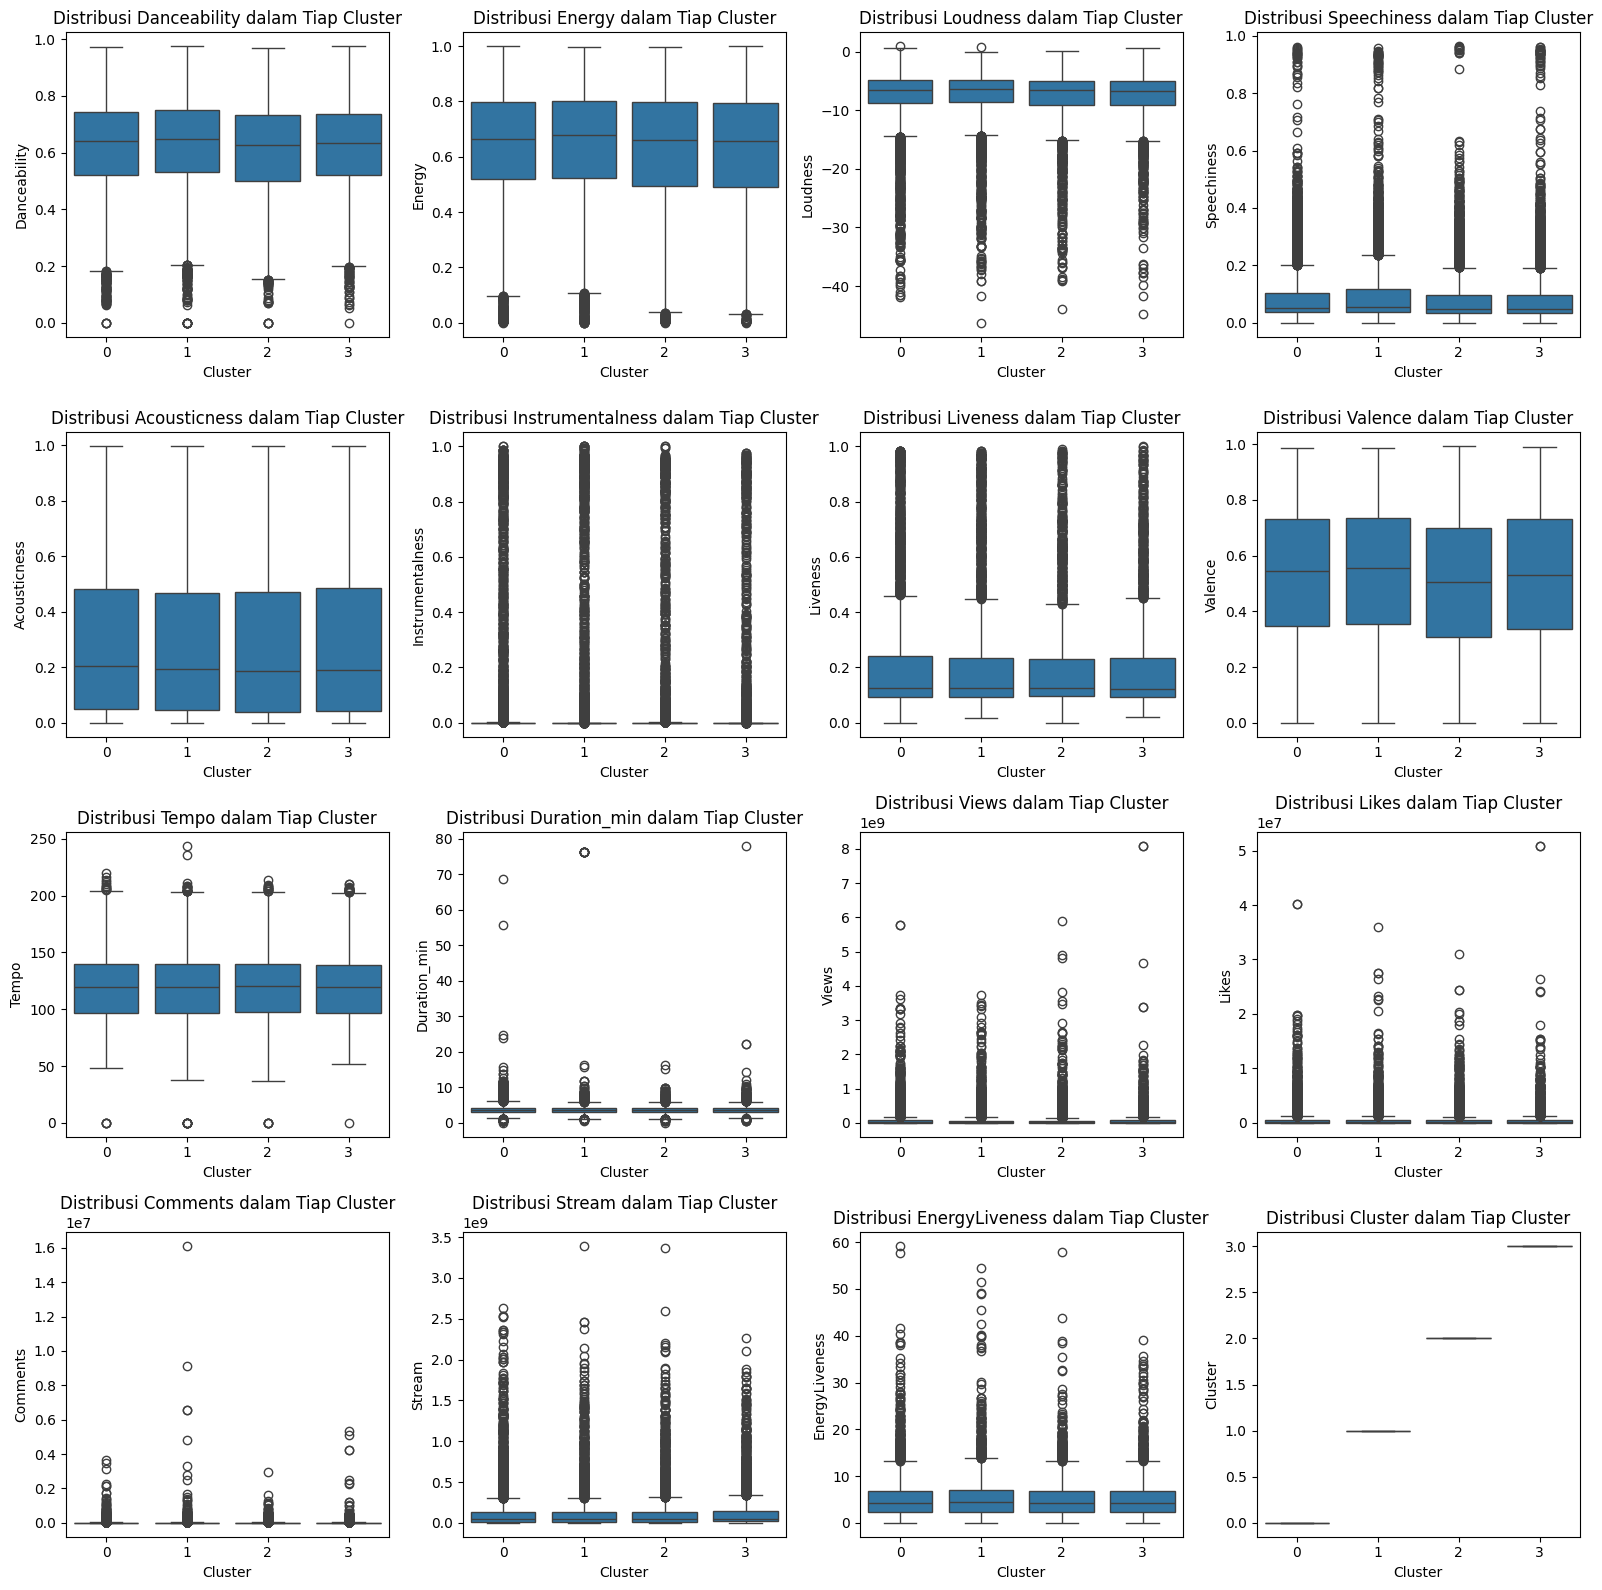

In [30]:
# Tentukan jumlah baris dan kolom untuk subplot
n_cols = 4  # Jumlah kolom dalam subplot
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Visualisasi distribusi nilai dalam setiap cluster
plt.figure(figsize=(16, 4 * n_rows))  # Menyesuaikan tinggi gambar sesuai banyaknya baris
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f"Distribusi {col} dalam Tiap Cluster")
    plt.tight_layout()

plt.show()

### 3.Analisis Korelasi antara Fitur dan Cluster

In [31]:
# Menambahkan label cluster ke dalam data
data['Cluster'] = agglo_labels_before  # Hasil clustering sebelum feature selection

# Pilih kolom numerik dan kategorikal untuk analisis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['Cluster']  # Hanya label cluster

# 1. Korelasi Point-Biserial untuk numerik vs kategori (Cluster)
for col in numerical_cols:
    correlation, _ = pointbiserialr(data[col], data['Cluster'])
    print(f"Korelasi Point-Biserial antara {col} dan Cluster: {correlation:.4f}")

# 2. Uji ANOVA untuk perbandingan rata-rata antar cluster
for col in numerical_cols:
    groups = [data[data['Cluster'] == i][col] for i in range(len(data['Cluster'].unique()))]
    f_stat, p_value = f_oneway(*groups)
    print(f"Uji ANOVA untuk {col}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

Korelasi Point-Biserial antara Danceability dan Cluster: -0.0148
Korelasi Point-Biserial antara Energy dan Cluster: -0.0165
Korelasi Point-Biserial antara Loudness dan Cluster: -0.0046
Korelasi Point-Biserial antara Speechiness dan Cluster: -0.0079
Korelasi Point-Biserial antara Acousticness dan Cluster: -0.0067
Korelasi Point-Biserial antara Instrumentalness dan Cluster: -0.0171
Korelasi Point-Biserial antara Liveness dan Cluster: -0.0175
Korelasi Point-Biserial antara Valence dan Cluster: -0.0196
Korelasi Point-Biserial antara Tempo dan Cluster: -0.0054
Korelasi Point-Biserial antara Duration_min dan Cluster: -0.0129
Korelasi Point-Biserial antara Views dan Cluster: -0.0071
Korelasi Point-Biserial antara Likes dan Cluster: -0.0038
Korelasi Point-Biserial antara Comments dan Cluster: 0.0003
Korelasi Point-Biserial antara Stream dan Cluster: 0.0112
Korelasi Point-Biserial antara EnergyLiveness dan Cluster: 0.0007
Korelasi Point-Biserial antara Cluster dan Cluster: 1.0000
Uji ANOVA untu

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Tulis hasil interpretasinya di sini.
Berikut adalah analisis karakteristik dari hasil clustering menggunakan AGGLOMERATIVE CLUSTERING

## **1. Korelasi Point-Biserial antara Fitur Numerik dan Cluster**

- Korelasi Point-Biserial digunakan untuk mengukur hubungan antara variabel numerik dan kategorikal (dalam hal ini, antara fitur numerik dan cluster). Berikut adalah interpretasi untuk beberapa fitur:

### **a. Danceability**
- Korelasi -0.0148 menunjukkan hubungan yang sangat lemah dan hampir tidak ada antara Danceability dan cluster.

### **b. Energy**
- Korelasi -0.0165 menunjukkan bahwa hubungan antara Energy dan cluster juga sangat lemah.

### **c. Loudness**
- Korelasi -0.0046 menunjukkan hampir tidak ada hubungan antara Loudness dan cluster.

### **d. Speechiness**
- Korelasi -0.0079 juga sangat rendah, yang menunjukkan hubungan yang sangat lemah antara Speechiness dan cluster.

### **e. Acousticness**
- Korelasi -0.0067 menunjukkan hubungan yang hampir tidak ada antara Acousticness dan cluster.

### **f. Instrumentalness**
- Korelasi -0.0171 menunjukkan hubungan yang sangat lemah antara Instrumentalness dan cluster.

### **g. Valence**
- Korelasi -0.0196 juga menunjukkan hubungan yang sangat lemah antara Valence dan cluster.

### **h. Stream**
- Korelasi 0.0112 menunjukkan sedikit hubungan positif yang sangat lemah antara Stream dan cluster.

### **i. EnergyLiveness**
- Korelasi 0.0007 menunjukkan hampir tidak ada hubungan antara EnergyLiveness dan cluster.

Secara keseluruhan, korelasi antara fitur numerik dan cluster sangat rendah, yang menunjukkan bahwa fitur-fitur ini mungkin tidak begitu mempengaruhi pembentukan cluster atau tidak ada hubungan yang kuat.

## **2. Hasil Uji ANOVA**
- Uji ANOVA digunakan untuk menguji apakah ada perbedaan yang signifikan antara rata-rata fitur numerik untuk masing-masing cluster. Berikut adalah interpretasi untuk beberapa fitur:

### **a. Danceability**
- F-statistic = 11.9331, p-value = 0.0000. p-value yang sangat rendah menunjukkan bahwa ada perbedaan yang signifikan antara rata-rata Danceability di berbagai cluster. Fitur ini memiliki perbedaan yang jelas antar cluster.

### **b. Energy**
- F-statistic = 5.3368, p-value = 0.0011. p-value yang rendah menunjukkan bahwa perbedaan rata-rata Energy di antara cluster juga signifikan.

### **c. Loudness**
- F-statistic = 1.0409, p-value = 0.3731. p-value yang lebih tinggi dari 0.05 menunjukkan bahwa tidak ada perbedaan yang signifikan antara rata-rata Loudness di berbagai cluster.

### **d.Speechiness**
- F-statistic = 9.8904, p-value = 0.0000. p-value yang sangat rendah menunjukkan bahwa ada perbedaan yang signifikan antara Speechiness di berbagai cluster.

### **e.Instrumentalness**
- F-statistic = 7.8090, p-value = 0.0000. p-value yang sangat rendah menunjukkan bahwa ada perbedaan yang signifikan antara Instrumentalness di berbagai cluster.

### **f.Valence**
- F-statistic = 20.2458, p-value = 0.0000. p-value yang sangat rendah menunjukkan bahwa ada perbedaan yang signifikan antara Valence di berbagai cluster.

### **g. Duration_min**
- F-statistic = 2.9571, p-value = 0.0311. p-value yang rendah menunjukkan bahwa ada perbedaan yang signifikan antara rata-rata Duration_min di berbagai cluster.

### **h. Stream**
- F-statistic = 2.9343, p-value = 0.0321. p-value yang rendah menunjukkan adanya perbedaan signifikan antara rata-rata Stream di berbagai cluster.
EnergyLiveness: F-statistic = 2.5825, p-value = 0.0516. p-value yang sedikit lebih tinggi dari 0.05 menunjukkan bahwa perbedaan rata-rata EnergyLiveness di cluster mungkin tidak signifikan.

## **3. Fitur yang Tidak Signifikan**
- Loudness dan Acousticness tidak menunjukkan perbedaan yang signifikan berdasarkan hasil uji ANOVA. Ini menunjukkan bahwa fitur-fitur ini tidak membedakan cluster dengan cara yang jelas.

- Likes, Views, dan Comments juga menunjukkan p-value yang tinggi (misalnya, Likes dengan p-value 0.9249) yang berarti tidak ada perbedaan signifikan dalam rata-rata antar cluster.

## **4. Fitur yang Signifikan**

- Beberapa fitur seperti Danceability, Speechiness, Instrumentalness, Valence, Duration_min, dan Stream menunjukkan hasil uji ANOVA yang signifikan. Ini berarti perbedaan antar cluster pada fitur-fitur ini cukup jelas dan bisa menjadi indikator penting dalam proses clustering.

## **5.Kesimpulan**

- Cluster 0, 1, 2, dan 3 menunjukkan perbedaan yang signifikan dalam beberapa fitur numerik, seperti **Danceability, Speechiness, Instrumentalness, Valence, dan Duration_min**. Hal ini berarti fitur-fitur ini dapat digunakan untuk membedakan cluster.

- Fitur seperti Loudness, Acousticness, dan Likes tidak menunjukkan perbedaan signifikan, yang berarti mereka tidak memberikan banyak informasi untuk membedakan antar cluster.

- Korelasi Point-Biserial yang rendah menunjukkan bahwa fitur numerik tidak berhubungan erat dengan label cluster, meskipun beberapa fitur masih memiliki perbedaan signifikan dalam uji ANOVA.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
#1. Distribusi Kategori per Cluster
distribusi_kategori = {}
for col in categorical_cols:
    distribusi_kategori[col] = data.groupby('Cluster')[col].value_counts().reset_index(name='count')

#2. Gabungkan distribusi kategori ke dalam satu file CSV
with open('distribusi_kategori_per_cluster.csv', 'w') as f:
    for col, df in distribusi_kategori.items():
        f.write(f"Distribusi {col} per Cluster\n")
        df.to_csv(f, index=False)
        f.write("\n")

#3. Korelasi Point-Biserial
correlation_results = []
for col in numerical_cols:
    correlation, _ = pointbiserialr(data[col], data['Cluster'])
    correlation_results.append([col, correlation])

correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Point-Biserial Correlation'])
correlation_df.to_csv('feature_correlation.csv', index=False)

#4. Uji ANOVA untuk perbandingan rata-rata antar cluster
anova_results = []
for col in numerical_cols:
    groups = [data[data['Cluster'] == i][col] for i in range(len(data['Cluster'].unique()))]
    f_stat, p_value = f_oneway(*groups)
    anova_results.append([col, f_stat, p_value])

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-statistic', 'p-value'])
anova_df.to_csv('anova_results.csv', index=False)

#5. Simpan data yang sudah diberi label cluster
data.to_csv('data_with_clusters.csv', index=False)

#6. Mendownload file yang disimpan
files.download('cluster_stats.csv')
files.download('data_with_clusters.csv')
files.download('feature_correlation.csv')
files.download('distribusi_kategori_per_cluster.csv')
files.download('anova_results.csv')


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>